In [2]:
import numpy as np #general library, will come in handy later
import random #this library is for choosing random numbers
import matplotlib.pyplot as plt #this library is for graphing things
import statsmodels.api as sm #this is for linear regression

#note this extra library
import pandas as pd #another nice library for storing matrices, it rely's on numpy

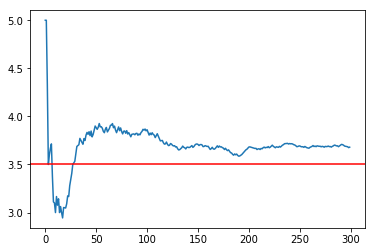

In [3]:
#homework question #2

dicerolls = [] #initialize rolls
means = []  #also calculate means

for i in range(300):
    dicerolls.append(random.randint(1,6)) #save rolls into  a list
    means.append( 1.0*sum(dicerolls)/len(dicerolls) ) #compute mean for each index

#graph dice rolls
plt.plot(means)
plt.axhline(3.5,color='r') #This is assymptotic expected value

In [5]:
#hw question #3 

#load data and set up variables
df = pd.read_csv('CARD.csv')
df['exper2'] = df['exper'] * df['exper']
df['const'] = 1 #note: statsmodel doesn't automatically add a constant. I didn't take off for this
print df

         lwage  educ  exper  fatheduc  motheduc  black  smsa  south  nearc4  \
0     6.306275     7     16       NaN       NaN      1     1      0       0   
1     6.175867    12      9       8.0       8.0      0     1      0       0   
2     6.580639    12     16      14.0      12.0      0     1      0       0   
3     5.521461    11     10      11.0      12.0      0     1      0       1   
4     6.591674    12     16       8.0       7.0      0     1      0       1   
5     6.214608    12      8       9.0      12.0      0     1      0       1   
6     6.336826    18      9      14.0      14.0      0     1      0       1   
7     6.410175    14      9      14.0      14.0      0     1      0       1   
8     6.052089    12     10      12.0      12.0      0     1      0       1   
9     6.244167    12     11      12.0      12.0      0     1      0       1   
10    5.416101     9     13      11.0      12.0      0     1      0       1   
11    5.991465    12      8      11.0       6.0     

In [7]:
#part a
model = sm.OLS(endog=df['lwage'],
               exog=df[['const','educ','exper','exper2','fatheduc','motheduc','black','smsa','south']],
               missing='drop')#run a regression of wage against educ without controls

results = model.fit()
print results.summary() 

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     100.3
Date:                Sun, 23 Sep 2018   Prob (F-statistic):          9.71e-143
Time:                        12:00:56   Log-Likelihood:                -981.75
No. Observations:                2220   AIC:                             1982.
Df Residuals:                    2211   BIC:                             2033.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6253      0.080     57.488      0.0

In [8]:
#part c) ii)

stage1 = sm.OLS(endog=df['educ'],
               exog=df[['const','nearc4','exper','exper2','fatheduc','motheduc','black','smsa','south']],
               missing='drop')

stage1_results = stage1.fit()
print stage1_results.summary() 

                            OLS Regression Results                            
Dep. Variable:                   educ   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     257.9
Date:                Sun, 23 Sep 2018   Prob (F-statistic):          8.47e-310
Time:                        12:01:00   Log-Likelihood:                -4528.6
No. Observations:                2220   AIC:                             9075.
Df Residuals:                    2211   BIC:                             9126.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7970      0.270     51.155      0.0

In [9]:
#part c) iii)

df['fitted_educ'] = stage1_results.fittedvalues

stage2 = sm.OLS(endog=df['lwage'],
               exog=df[['const','fitted_educ','exper','exper2','fatheduc','motheduc','black','smsa','south']],
               missing='drop')

stage2_results = stage2.fit()
print stage2_results.summary() #note, the standard errors are not correct

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     56.69
Date:                Sun, 23 Sep 2018   Prob (F-statistic):           2.99e-84
Time:                        12:01:09   Log-Likelihood:                -1118.3
No. Observations:                2220   AIC:                             2255.
Df Residuals:                    2211   BIC:                             2306.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.1460      1.315      3.153      